In [31]:
from scipy.stats import uniform,expon,norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Diffirent types of Continuos probability distribution

## 1-Uniform Continuos distribution

In [32]:
# distribution where all values in a given interval are equally likely to occur.
# mean = (a+b) / 2
# variance = (b-a)**2 /12
a = 10  #start
b = 40 #end
uniform.stats(loc=a , scale=b-a , moments='mv')

(25.0, 75.0)

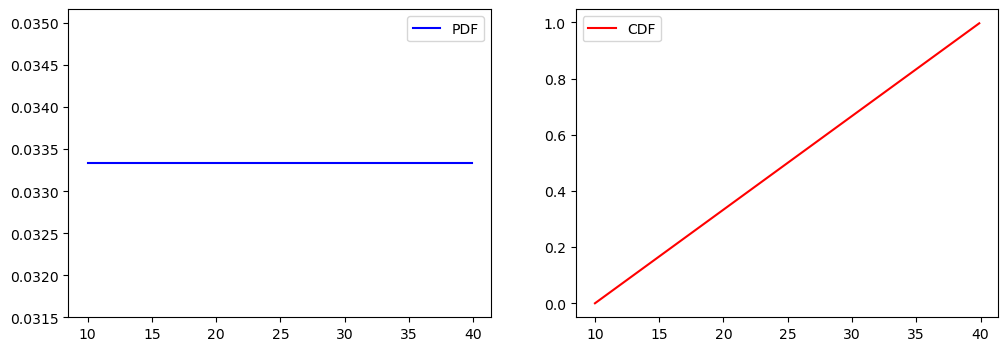

In [33]:
x = np.arange(a,b,0.1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
pdf = uniform.pdf(x, loc=a , scale=b-a )           # probability density function
plt.plot(x, pdf, color='blue', label='PDF')
plt.legend()
plt.subplot(1,2,2)
cdf = uniform.cdf(x , loc=a , scale=b-a )           # cumulative density function (to calculate probability of interval)
plt.plot(x , cdf ,color='red' , label="CDF")

plt.legend()
plt.show()

## 2-Exponential Continuos distribution

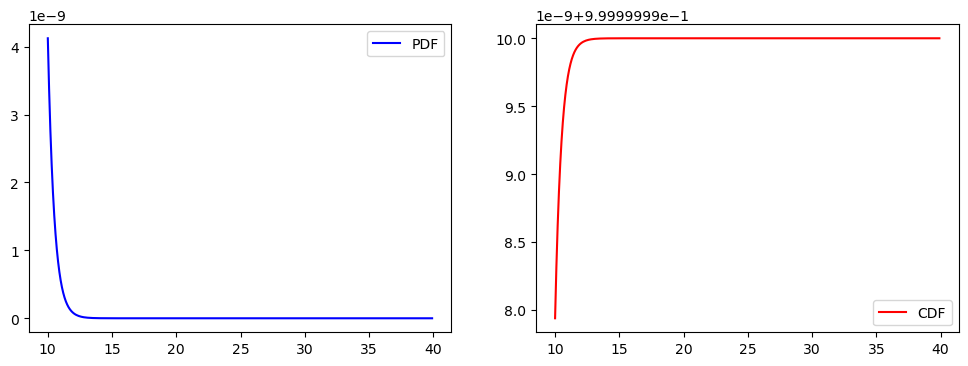

In [34]:
# Exponential Distribution models the time between events in a Poisson process .
# the Same Ex in poisson where 2 students arriving in 1min (lambda = 2) => that means that the time interval between each student arriving is .5 min

lambda_ = 2 
time = np.arange(0,61,1)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
pdf = expon.pdf(x,scale=1/lambda_)           # probability density function
plt.plot(x, pdf, color='blue', label='PDF')
plt.legend()
plt.subplot(1,2,2)
cdf = expon.cdf(x,scale=1/lambda_)           # cumulative density function (to calculate probability of interval)
plt.plot(x , cdf ,color='red' , label="CDF")
plt.legend()
plt.show()

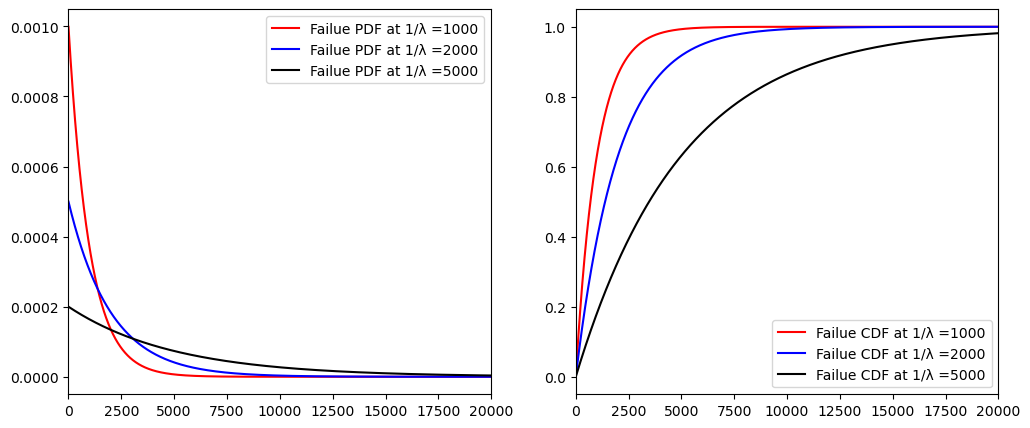

In [35]:
# λ It controls how quickly the curve decreases (larger labmda quicker decreases)
# this is used widely in failure analysis => larger labmda (more failures per period) means quicker to fail

# car fails after period of kilometers (1/λ) km
plt.figure(figsize=(12,5))
time = np.linspace(1,20000,10000)
rates = [1000,2000,5000]
colors=['r','b','k']
for i,rate in enumerate(rates,1):
    plt.subplot(1,2,1)
    plt.xlim(0,20000)
    pdf = expon.pdf(time,scale=rate)           
    plt.plot(time,pdf,color=colors[i-1],label=f"Failue PDF at 1/λ ={rate}")
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlim(0,20000)
    cdf = expon.cdf(time,scale=rate)           
    plt.plot(time,cdf,color=colors[i-1],label=f"Failue CDF at 1/λ ={rate}")
    plt.legend()
    

## 3.Normal distribution

In [36]:
# Continuous probability distribution that is symmetric around its mean (μ), forming the famous bell-shaped curve.
# μ = Median = Mode

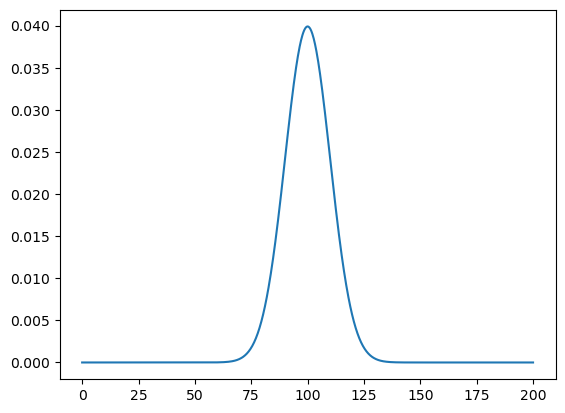

In [37]:
x_values = np.linspace(0,200,1000)
mean = 100
std = 10
normal_distribution = norm.pdf(x_values,loc = mean , scale = std)
plt.plot( x_values , normal_distribution )

<Axes: ylabel='Count'>

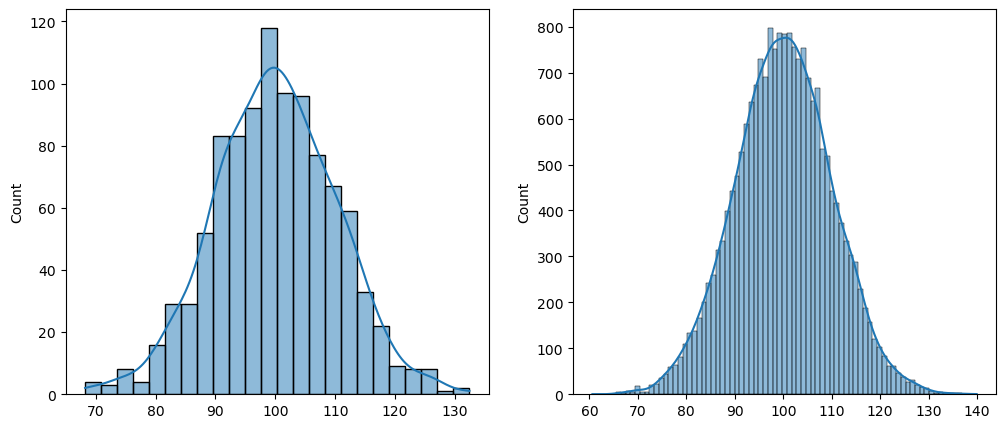

In [38]:
# generate Sample from distribution
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
normalized_data=np.random.normal(loc = mean , scale = std , size= 1000)
sns.histplot(normalized_data,kde=True)

# bigger sample => more normalized 
plt.subplot(1,2,2)
normalized_data=np.random.normal(loc = mean , scale = std , size= 20000)
sns.histplot(normalized_data,kde=True)

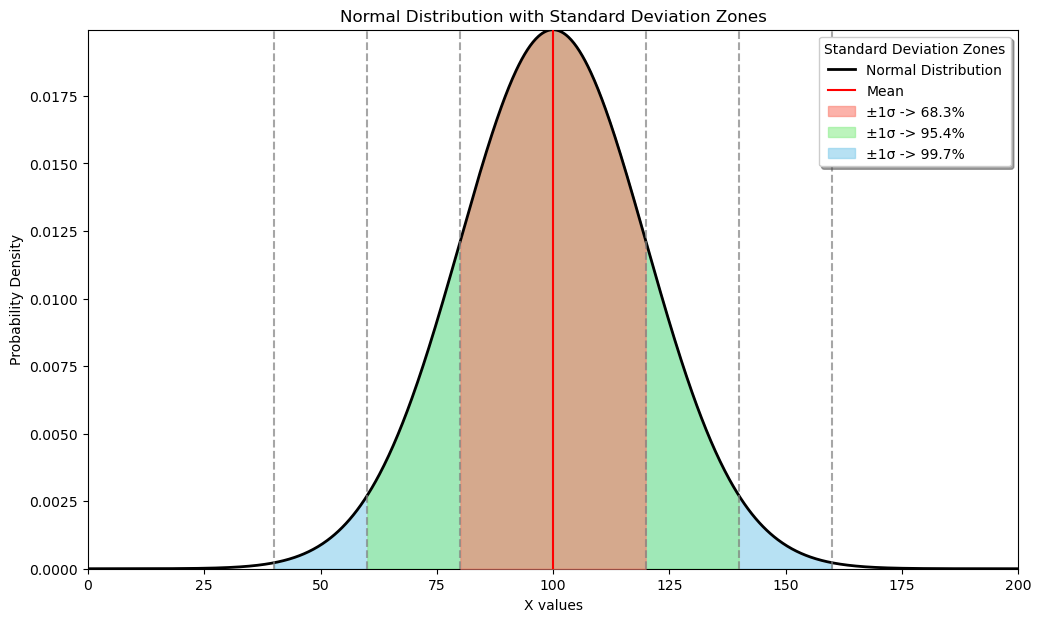

In [39]:
#------------------- for normal distribution -------------------
# 68.3 % of data falls within ± 1 standard deviation of the mean
# 95.4 % -------------------- ± 2-------------------------------
# 99.7 % ------------------ ± 3-------------------------------

mu = 100
sigma = 20
x_values = np.linspace(0, 200, 1000)
normal_distribution = norm.pdf(x_values, loc=mu, scale=20)
plt.figure(figsize=(12,7))
plt.ylim(0,normal_distribution.max() )
plt.xlim(min(x_values), max(x_values))
colors=['salmon','lightgreen','skyblue']
plt.plot(x_values, normal_distribution, color='black', linewidth=2, label='Normal Distribution', zorder=4)
plt.axvline(mu, color='r', alpha=1, zorder=5,label='Mean')
for i in [1, 2, 3]:
    plt.axvline(mu + i*sigma, color='gray', linestyle='--', alpha=0.7, zorder=5)
    plt.axvline(mu - i*sigma, color='gray', linestyle='--', alpha=0.7, zorder=5)
    percent = (norm.cdf(mu+i*sigma,mu,sigma)-norm.cdf(mu-i*sigma,mu,sigma))*100 
    plt.fill_between(x_values, normal_distribution,
                 where=(x_values > mu - i*sigma) & (x_values < mu + i*sigma),
                 color=colors[i-1], alpha=0.6, label=f"±1σ -> {percent:.1f}%", zorder=4-i)

plt.legend(title="Standard Deviation Zones", loc="upper right", frameon=True, fancybox=True, shadow=True)
plt.xlabel("X values")
plt.ylabel("Probability Density")
plt.title("Normal Distribution with Standard Deviation Zones")
plt.show()


In [68]:
# using ppf to find number that % of data falls in
percents = [0.6826894921370859,0.9544997361036416,0.9973002039367398]               # these are the actual values of prob not the aproximates
for percent in percents:
    number = norm.ppf(0.5 + percent/2 , mu , sigma)
    print(f"{percent*100:.1f} % of data lies from -{number:.0f} to {number:.0f} which are {(number-mu) / sigma:.0f} Z score -> valid")

68.3 % of data lies from -120 to 120 which are 1 Z score -> valid
95.4 % of data lies from -140 to 140 which are 2 Z score -> valid
99.7 % of data lies from -160 to 160 which are 3 Z score -> valid
